## Data Cleaning People involved in Accidents BCN:
#### In this Jupyter Notebook you will find the process of data cleaning of a dataset from Ajuntament de Barcelona Open Data on people involved in accidents.

We import the libraries that we will be using.

In [1]:
import pandas as pd
import numpy as np

Import of dataset.

In [2]:
peop = pd.read_csv('../Data/Raw_data/people_accident.csv', sep = ';',  encoding='utf-8',dtype = 'object')

I examine the data that I have imported.

In [3]:
peop.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Desc_Tipus_vehicle_implicat,Descripcio_sexe,Edat,Descripcio_tipus_persona,Descripcio_situacio,Descripcio_victimitzacio,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018S000001,3,Sants-MontjuÃ¯c,11,el Poble-sec,273400,ParalÂ·lel ...,117-119,Dilluns,Dl,...,Turisme,Home,41,Conductor,Presentat,Ferit lleu: Amb assistÃ¨ncia sanitÃ ria en llo...,429910.63,4580909.28,2.160.723,41.374.806
1,2018S000001,3,Sants-MontjuÃ¯c,11,el Poble-sec,273400,ParalÂ·lel ...,NaN,Dilluns,Dl,...,Turisme,Home,54,Conductor,Presentat,Ferit lleu: Amb assistÃ¨ncia sanitÃ ria en llo...,429910.63,4580909.28,2.160.723,41.374.806
2,2018S000002,2,Eixample,9,la Nova Esquerra de l'Eixample,361406,Viladomat / RossellÃ_ ...,NaN,Dilluns,Dl,...,Ciclomotor,Home,45,Conductor,Presentat,Ferit lleu: HospitalitzaciÃ_ fins a 24h,428882.97,4582216.76,2.148.281,41.386.492
3,2018S000003,10,Sant MartÃ_,64,el Camp de l'Arpa del Clot,161407,IndÃºstria ...,252,Dilluns,Dl,...,Motocicleta,Home,70,Conductor,Presentat,Ferit lleu: HospitalitzaciÃ_ fins a 24h,431447.19,4585099.12,2.178.621,41.412.675
4,2018S000005,8,Nou Barris,56,Vallbona,330606,C-17 (Barcelona) ...,K14,Dilluns,Dl,...,Turisme,Dona,33,Conductor,Presentat,Ferit lleu: HospitalitzaciÃ_ fins a 24h,431568.59,4590758.85,2.179.432,41.463.661


As I want to study which common characteristics the people involved in an accident have, there are some columns that I won't use, so I will drop them.

In [4]:
peop.columns #Checking the names of the columns.

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_ any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_causa_vianant', 'Desc_Tipus_vehicle_implicat',
       'Descripcio_sexe', 'Edat', 'Descripcio_tipus_persona',
       'Descripcio_situacio', 'Descripcio_victimitzacio', 'Coordenada_UTM_X',
       'Coordenada_UTM_Y', 'Longitud', 'Latitud'],
      dtype='object')

In [5]:
#Dropping columns that I will not be using.
peop.drop(columns = ['Codi_districte', 'Nom_districte', 'Codi_barri', \
                    'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ', \
                    'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any', \
                    'Mes_ any', 'Nom_mes', 'Dia_mes', 'Hora_dia',\
                    'Descripcio_causa_vianant','Coordenada_UTM_X',\
                    'Coordenada_UTM_Y', 'Longitud', 'Latitud', 'Descripcio_situacio', 'Descripcio_victimitzacio' ], inplace = True)

I rename the columns in order to make them self-explanatory.

In [7]:
peop.rename(columns = {'Codi_expedient': 'Accident_code', 'Desc_Tipus_vehicle_implicat': 'Vehicle_type', \
                      'Descripcio_sexe':'Gender','Descripcio_tipus_persona':'People_type',\
                      'Edat':'Age'},
          inplace = True)

##### Vehicle_type Column:
First I check the different values inside this column.

In [28]:
peop['Vehicle_type'].value_counts() #Some values can be changed, Turismo and Turisme is the same.

Bike    29853
Car      6846
Name: Vehicle_type, dtype: int64

I decided to change the name of different vehicle types and translate them into English.

In [9]:
peop['Vehicle_type'].replace({'Turisme':'Car', 'Turismo':'Car', 'Todo terreno':'Car', \
                             'Tot terreny':'Car','Motocicleta':'Bike','Ciclomotor':'Bike'}, inplace = True)

As I am going to study which are the common attributes of people on accidents, I will base my study only on Cars and Bikes.

In [10]:
peop = peop.query('Vehicle_type == "Car" | Vehicle_type == "Bike"')

##### People_type Column
First,we check the values on People_type column:

In [11]:
peop.People_type.value_counts() #I will only keep driver since are the ones that have to pay insurance.

Conductor    36699
Passatger     8228
Vianant       3886
Name: People_type, dtype: int64

In [12]:
peop['People_type'].replace({'Conductor':'Driver'}, inplace = True) 
#Changed the value Conductor to Driver to make it more understandable.

Since my analysis is about insurances, I will keep only the drivers, since they are the only ones subject to pay an insurance.

In [13]:
peop = peop.query('People_type == "Driver"') #I kept drivers and assigned them to peop variable.

##### Gender Column
Let's check Gender Column.

In [15]:
peop.Gender.value_counts()

Home          26147
Dona          10274
Desconegut      278
Name: Gender, dtype: int64

3 unique values: Home (man), Dona (woman), Desconegut (Unknown). I will translate them into English to make it more understandable.

In [16]:
peop['Gender'].replace({'Home':'Man', 'Dona':'Woman', 'Desconegut':'Unknown'}, inplace = True)

##### Age Column
First, I will get rid of the 'Desconegut' ages.

In [21]:
peop['Age'].replace({'Desconegut':999}, inplace = True) #Some unknown values as Desconegut, changed to 999.

Now, I am going to change the datatype into integer.

In [25]:
peop['Age'] = peop.Age.astype('int') #Changed to int.

Now, I am going to explore the distribution of Ages, to see if there are outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa747b8>]],
      dtype=object)

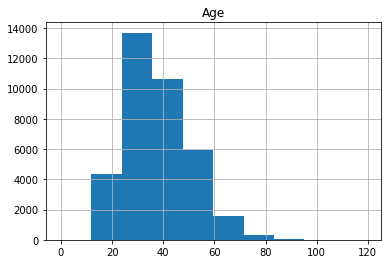

In [27]:
peop.query('Age < 999').hist() #No outliers

In [32]:
len(peop.query('Age > 900 | Gender == "Unknown"'))*100/len(peop) #1% of unknown rows either in Gender or in Age.

1.188043270933813

Since the proportion of unknown information is 1.19%, I will drop these rows.

In [35]:
peop = peop.query('Age < 900 & Gender != "Unknown"') #Getting rid of unknown information.

Last step, I will save the clean dataset in my repository.

In [37]:
peop.to_csv('../Data/Clean_data/clean_people_bcn.csv') #Saving the file in Clean_data.